# Part II - Explanatory Data Analysis of Prosper Loan Dataset
## by Henry Ime Mbom

## Investigation Overview 
> In this investigation, I examined how some key features in the Prosper Loan dataset affects the Borrower's interest rate and Borrower's Annual Percentage Rate (APR)- which are the variables of interest. The variables that supported this investigation include:  CreditGrade,AvailableBankcardCredit, StatedMonthlyIncome, MonthlyLoanPayment,EmploymentStatus , Occupation and LoanStatus.


## Dataset Overview

> This dataset contains the customer's data from a loan company known as Prosper. This dataset comprises of 113,937 observation with 81 Features on each loan which includes loan amount, borrower rate, current loan status, borrower income, Prosper score, etc. A detailed description of the dataset can be found in a link given in the READme file.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe.
loan_data = pd.read_csv('prosperLoanData.csv')
# Performing summary statistics 
loan_data.BorrowerRate.describe()
loan_data.BorrowerAPR.isnull().sum();

## Distribution of variables of interest.

> Both variables are unimodal in nature.initially the count of BorrowerAPR values between 0.00 and 0.05 appears to be nearly zero when plotted on a histogram compared to the count of BorrowerRate which is above 10000 in this range.Transforming the count axis of BorrowerAPR variable to a log scale reveals more about the count of BorrowerAPR in the range 0.00 to 0.05. In addition, BorrowerAPR variable was observed to contain 25 missing value programmatically.

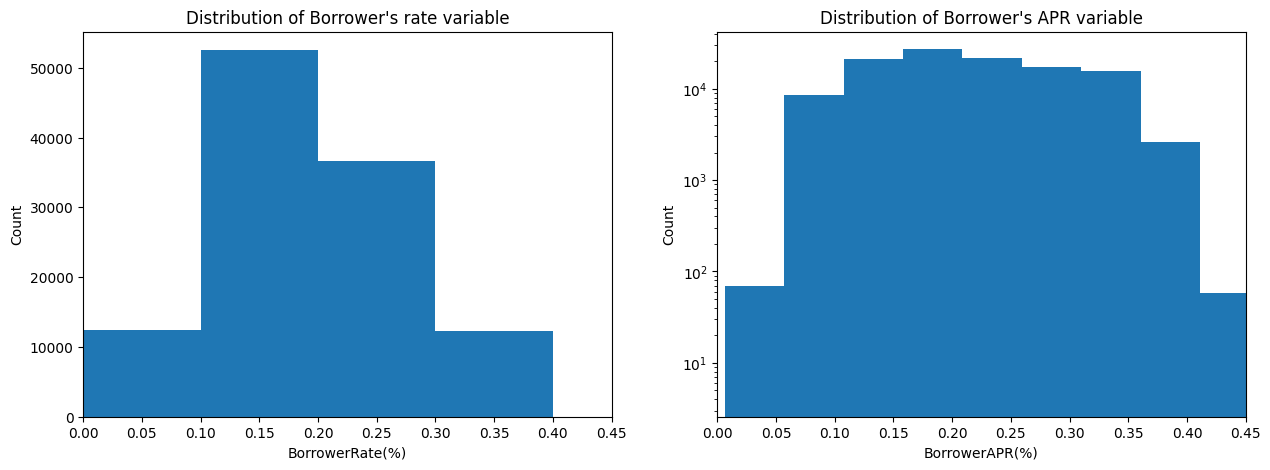

In [3]:
#Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [15, 5]) 
# histogram on left
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0,loan_data.BorrowerRate.max()+ 0.2,0.1)
plt.hist(data = loan_data, x = 'BorrowerRate', bins= bins);
plt.xlabel('BorrowerRate(%)')
plt.xlim((0,0.45))
plt.ylabel('Count')
plt.title("Distribution of Borrower's rate variable")

# histogram on right
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, loan_data.BorrowerAPR.max()+0.2,0.1)
plt.hist(data = loan_data, x = 'BorrowerAPR');
plt.xlabel('BorrowerAPR(%)')
plt.xlim((0,0.45))
plt.yscale('log')
plt.title("Distribution of Borrower's APR variable")
plt.ylabel('Count');

## Distribution of ProsperScore Variable

> The ProsperScore with the highest frequency is 4.0 which is less than half of the best score(10.0). The least frequency ProsperScore is 1.0. ProsperScore of 11.0 suggests an unusual value or an outlier since the ProsperScore lie between 0.0 to 10.0 based on the data description

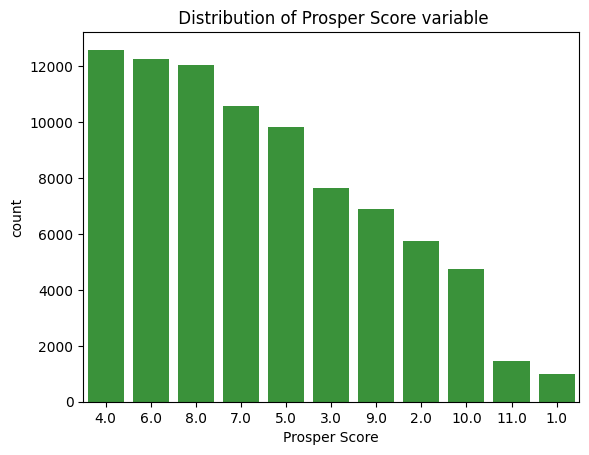

In [4]:
def plotting_bar(series, label):
    label = label
    base_color = sb.color_palette()[2]
    loan_order = series.value_counts().index
    sb.countplot(data=loan_data, x = label, color = base_color, order = loan_order)
    
plotting_bar(loan_data.ProsperScore, 'ProsperScore')
plt.xlabel('Prosper Score')
plt.title(' Distribution of Prosper Score variable');

## Distribution of Stated Monthly Income.

> The histogram plot of the original data is highly driven to the left of the axis.Using summary statistics I figured out the maximum count value to be 1750000, which could have caused an outlier or error in the plot. So I created a second visualization where the top 1% of the data were dropped from the original dataset and obtained a more reasonable plot.



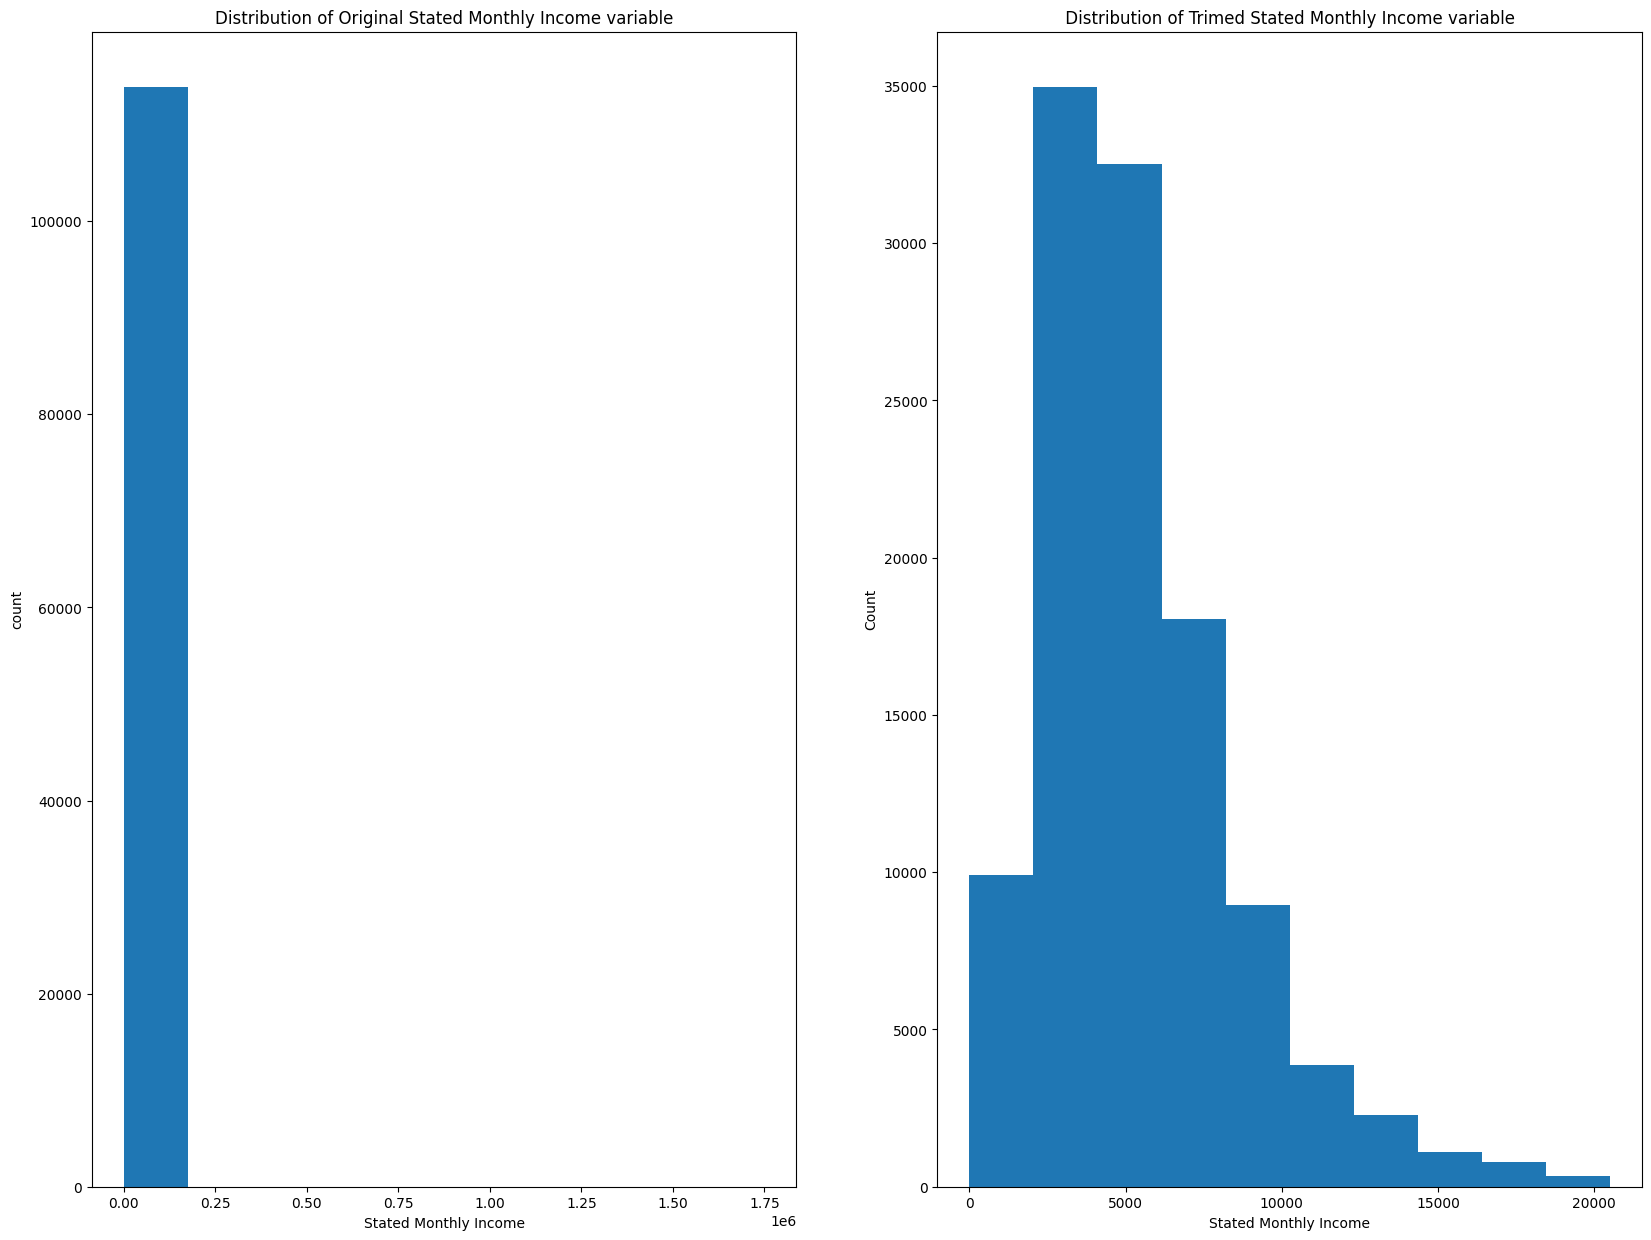

In [5]:
# Describing and sorting the loan dataset by stated monthly income
loan_data.describe()
loan_dataTrim=loan_data.sort_values(by = 'StatedMonthlyIncome', ascending=False).reset_index(drop = True )
loan_dataTrim.StatedMonthlyIncome.head();
# looking for the value of 1% of the sorted dataset
loan_dataTrim.shape[0]*0.01

plt.figure(figsize = [ 20, 15])
plt.subplot(1,2,1)
# Plotting the stated monthly income variableif
plt.hist(data = loan_data, x = 'StatedMonthlyIncome');
plt.xlabel('Stated Monthly Income');
plt.ylabel('count');
plt.title('Distribution of Original Stated Monthly Income variable')

plt.subplot(1,2,2)
# Removing 1% of the dataset and plotting the trimmed dataset
loan_dataTrim.drop(loan_dataTrim.iloc[0:1141].index,inplace=True)
plt.hist(data = loan_dataTrim, x = 'StatedMonthlyIncome');
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.title(' Distribution of Trimed Stated Monthly Income variable ');


## Distribution of Employment Status variable.

> The number of Employed borrowers in the dataset is above 60000. This is reseasonable as it comprises of Full-time, self employed , part time and other category. The full time borrowers are more than the self employed borrowers; with the least being the part time borrowers. The numbers of umemployed and retired borrowrs however are very minimal.



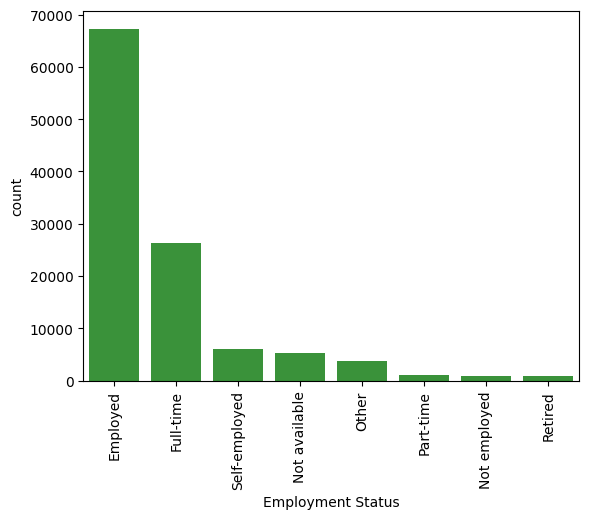

In [6]:
plotting_bar(loan_data.EmploymentStatus, 'EmploymentStatus')
plt.xticks(rotation = 90);
plt.xlabel('Employment Status');

## Borrower's rate VS Borrower's APR.

> I used a heat map to show the relationship between Borrower's rate and APR. For both varaibles, the number of datapoint counts is highest where both variable intersect in the range 0.1 to 0.2. This shows great correlation in this between the variables in this range.

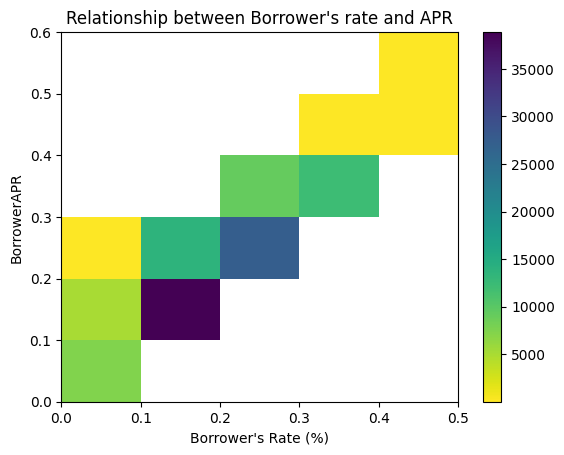

In [7]:
def plotting_heat():
  # data setup.
  loan_dataTrim=loan_data.sort_values(by = 'StatedMonthlyIncome',ascending = False).reset_index(drop=True)
  bins_x = np.arange(0, loan_data.BorrowerRate.max()+0.1, 0.1)
  bins_y = np.arange(0, loan_data.BorrowerAPR.max()+0.1, 0.1)
  plt.hist2d(data = loan_data, x = 'BorrowerRate', y = 'BorrowerAPR',
  bins = [bins_x, bins_y], cmap = 'viridis_r', cmin=0.5)
  plt.colorbar()
  plt.xlabel("Borrower's Rate (%)")
  #plt.yscale('log')
  plt.ylabel('BorrowerAPR')
  plt.title("Relationship between Borrower's rate and APR")
  
plotting_heat()

## Prosper score vs Borrower's rate.

> The plot shows strong correlation between the prosper rating with the borrower’s rate. On a general note, the borrower rate is highly correlated for Prosper's score between 3.0 and 8.0. From 8.0 to 11.0, the borrower's rate decreases.

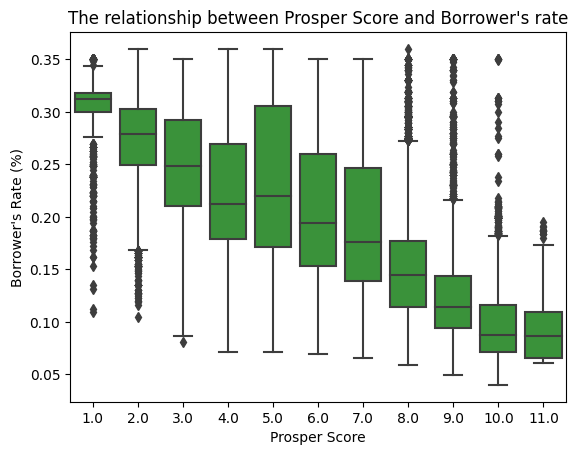

In [8]:
# choose color palette 
base_color = sb.color_palette()[2]
sb.boxplot(data= loan_data, x='ProsperScore', y='BorrowerRate', color=base_color);
plt.ylabel("Borrower's Rate (%)")
plt.xlabel('Prosper Score');
plt.title("The relationship between Prosper Score and Borrower's rate");

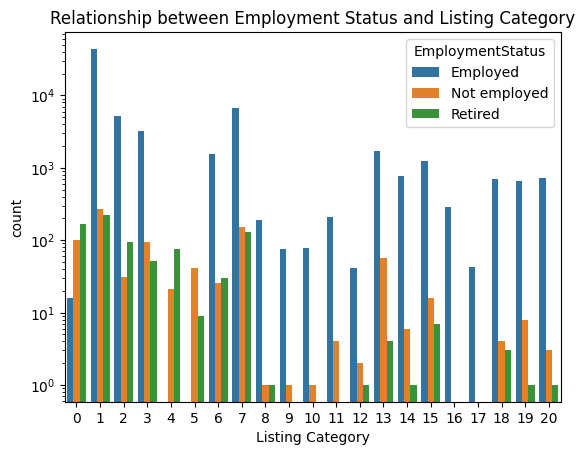

In [9]:
#Renaming the listing variable column from ListingCategory (numeric) to ListingCategory
loan_data.rename(columns = { 'ListingCategory (numeric)' : 'ListingCategory'},inplace = True)
loan_update = loan_data.copy()
index_names = loan_update[ (loan_update.EmploymentStatus != 'Employed') & ( loan_update.EmploymentStatus != 'Retired') & (loan_update.EmploymentStatus != 'Not employed')].index
loan_update.drop(index_names, inplace = True)
loan_update.EmploymentStatus.value_counts()
# listing = ['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
sb.countplot(data = loan_update, x = 'ListingCategory', hue = 'EmploymentStatus');
plt.yscale('log')
plt.xlabel('Listing Category');
plt.title('Relationship between Employment Status and Listing Category');
# ax.set_xticklabels(listing,rotation = 

### Borrower's rate VS Available Bank card credit by Employment status.

> Majority of the borrowers with available credit below 100000 dollars were unemployed,retired and part time workers.Self employed and full time borrowers have credits extending to up to 300000 dollars. mployment status are represented.

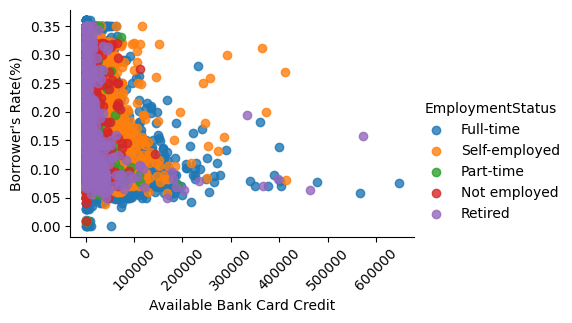

In [10]:
# dropping 'other' and 'Not available' columns
loan_data1 = loan_data.copy()
index_names = loan_data1[ ( loan_data1.EmploymentStatus != 'Retired') & (loan_data1.EmploymentStatus != 'Not employed')  & (loan_data1.EmploymentStatus != 'Full-time') & (loan_data1.EmploymentStatus != 'Part-time')   & (loan_data1.EmploymentStatus != 'Self-employed')].index
loan_data1.drop(index_names, inplace = True)

# A facet grid plot of the relationship between variable
g= sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
#plt.subplot(1,2,1)
#g = sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
g= g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', fit_reg =  False, x_jitter = 0.6)
plt.xlabel('Available Bank Card Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 45)
g.add_legend();

In [ ]:
!jupyter nbconvert Explanatory_ProsperLoanData2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Explanatory_ProsperLoanData2.ipynb to slides
[NbConvertApp] Writing 762319 bytes to Explanatory_ProsperLoanData2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Explanatory_ProsperLoanData2.slides.html
Use Control-C to stop this server
